In [1]:
import pandas as pd

# Defining the list of seasons again
seasons = ["{0:02d}{1:02d}".format(y, y+1) for y in range(2, 23)]  # Corrected range to start from 2 for season 2002-2003

#

dfs = []

for season in seasons:
    # Read results table
    results = pd.read_csv(f"C:/Users/arunr/OneDrive/Desktop/PremierLeagueData/Result_Premier_{season}.csv", index_col=0)

    # reset index to prepare for melt
    df_reset = results.reset_index()

    # melt the DataFrame into a long format
    melted_df = df_reset.melt(id_vars=df_reset.columns[0], var_name='Away', value_name='Score')

    # rename the first column to 'Home'
    melted_df.rename(columns={melted_df.columns[0]: 'Home'}, inplace=True)

    # Add season column
    melted_df['Season'] = f'20{season[:2]}-20{season[2:]}'
    
    dfs.append(melted_df)

# Concatenate all dataframes together
all_results = pd.concat(dfs)

# Set Home, Away and Season as your multi-index
all_results.set_index(['Home', 'Away', 'Season'], inplace=True)

pivot_dfs = []

for df in dfs:
    pivot_df = df.pivot(index='Home', columns='Away', values='Score')
    pivot_dfs.append(pivot_df)

all_results.head(), pivot_dfs[0].head()  # Displaying the head of all_results and the first pivoted DataFrame


(                                Score
 Home             Away Season         
 Arsenal          ARS  2002-2003      
 Aston Villa      ARS  2002-2003   1~1
 Birmingham City  ARS  2002-2003   0~4
 Blackburn Rovers ARS  2002-2003   2~0
 Bolton Wanderers ARS  2002-2003   2~2,
 Away              ARS  AST  BIR  BLB  BOL  CHA  CHE  EVE  FUL  LEE  LIV  MCI  \
 Home                                                                           
 Arsenal                3~1  2~0  1~2  2~1  2~0  3~2  2~1  2~1  2~3  1~1  2~1   
 Aston Villa       1~1       0~2  3~0  2~0  2~0  2~1  3~2  3~1  0~0  0~1  1~0   
 Birmingham City   0~4  3~0       0~1  3~1  1~1  1~3  1~1  0~0  2~1  2~1  0~2   
 Blackburn Rovers  2~0  0~0  1~1       0~0  1~0  2~3  0~1  2~1  1~0  2~2  1~0   
 Bolton Wanderers  2~2  1~0  4~2  1~1       1~2  1~1  1~2  0~0  0~3  2~3  2~0   
 
 Away              MID  MUN  NEW  SOU  SUN  TOT  WBA  WHU  
 Home                                                      
 Arsenal           2~0  2~2  1~0  6~1

In [2]:
pivot_dfs

[Away                  ARS  AST  BIR  BLB  BOL  CHA  CHE  EVE  FUL  LEE  LIV  \
 Home                                                                          
 Arsenal                    3~1  2~0  1~2  2~1  2~0  3~2  2~1  2~1  2~3  1~1   
 Aston Villa           1~1       0~2  3~0  2~0  2~0  2~1  3~2  3~1  0~0  0~1   
 Birmingham City       0~4  3~0       0~1  3~1  1~1  1~3  1~1  0~0  2~1  2~1   
 Blackburn Rovers      2~0  0~0  1~1       0~0  1~0  2~3  0~1  2~1  1~0  2~2   
 Bolton Wanderers      2~2  1~0  4~2  1~1       1~2  1~1  1~2  0~0  0~3  2~3   
 Charlton Athletic     0~3  3~0  0~2  3~1  1~1       2~3  2~1  0~1  1~6  2~0   
 Chelsea               1~1  2~0  3~0  1~2  1~0  4~1       4~1  1~1  3~2  2~1   
 Everton               2~1  2~1  1~1  2~1  0~0  1~0  1~3       2~0  2~0  1~2   
 Fulham                0~1  2~1  0~1  0~4  4~1  1~0  0~0  2~0       1~0  3~2   
 Leeds United          1~4  3~1  2~0  2~3  2~4  1~2  2~0  0~1  2~0       0~1   
 Liverpool             2~2  1~1  2~2  1~

In [3]:
import numpy as np

# Using the first season as an example
season_df = pivot_dfs[0]

# Number of teams
N = season_df.shape[0]

# Initialize the results matrix
R = np.zeros((N, N), dtype=int)

# Modify the score_to_result function to handle unexpected values

def score_to_result(score):
    if isinstance(score, float) or "~" not in score:  # Diagonal, missing entries, or unexpected format
        return 0
    home, away = score.split("~")
    try:
        home, away = int(home.strip()), int(away.strip())
    except ValueError:  # In case of unexpected characters in the score
        return 0
    if home > away:
        return 1  # win
    elif home == away:
        return 2  # draw
    else:
        return 3  # loss

# Populate the results matrix again
for i in range(N):
    for j in range(N):
        R[i, j] = score_to_result(season_df.iloc[i, j])

R



array([[0, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1],
       [2, 0, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1],
       [3, 1, 0, 3, 1, 2, 3, 2, 2, 1, 1, 3, 1, 3, 3, 1, 1, 2, 1, 2],
       [1, 2, 2, 0, 2, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2],
       [2, 1, 1, 2, 0, 3, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 2, 1],
       [3, 1, 3, 1, 2, 0, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 3, 1, 1],
       [2, 1, 1, 3, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3],
       [1, 1, 2, 1, 2, 1, 3, 0, 1, 1, 3, 2, 1, 3, 1, 1, 1, 2, 1, 2],
       [3, 1, 3, 3, 1, 1, 2, 1, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3],
       [3, 1, 1, 3, 3, 3, 1, 3, 1, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1],
       [2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 3, 2, 3, 2, 1, 2, 1, 1, 1],
       [3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 1, 3, 1, 3, 3, 3],
       [1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1],
       [3, 3, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2],
       [2, 2, 1, 1, 1, 1, 1, 1, 1,

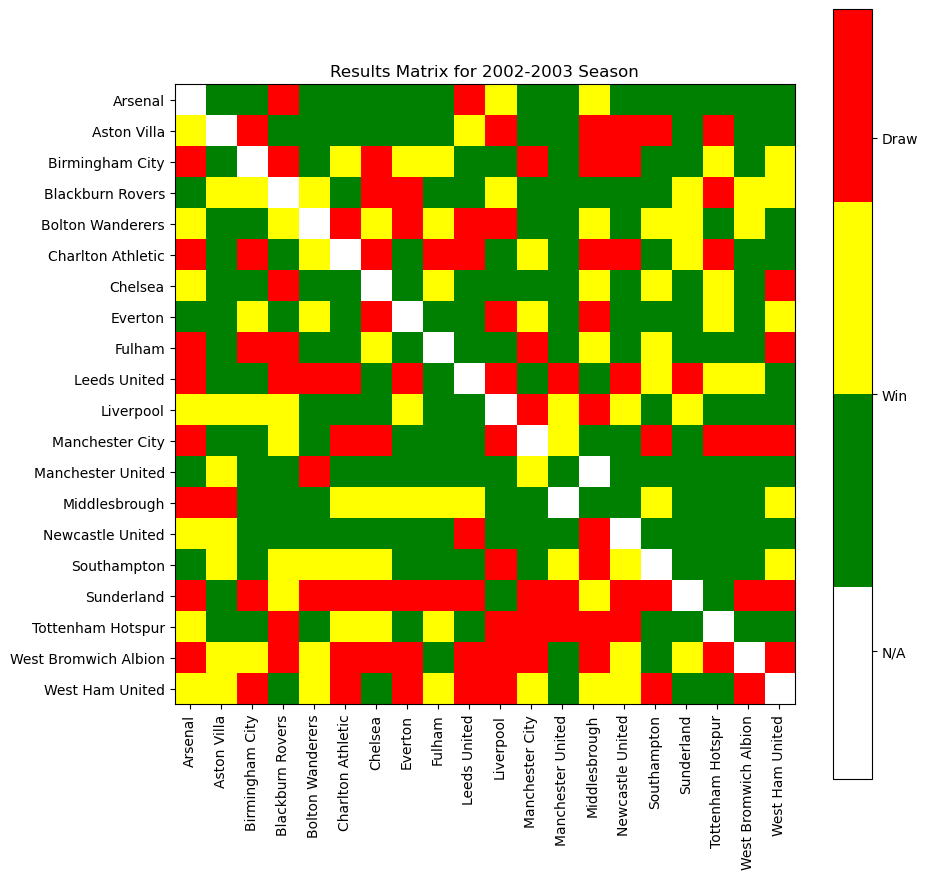

In [4]:
import matplotlib.pyplot as plt


# Create a colormap based on the results matrix
cmap = plt.cm.colors.ListedColormap(['white', 'green', 'yellow', 'red'])

# Plot the matrix using the colormap
plt.figure(figsize=(10, 10))
plt.imshow(R, cmap=cmap, vmin=0, vmax=3)  # vmin and vmax set to match our encoding
plt.title("Results Matrix for 2002-2003 Season")
cbar = plt.colorbar(ticks=[0.5, 1.5, 2.5, 3.5])
cbar.set_ticklabels(['N/A', 'Win', 'Draw', 'Loss'])
plt.xticks(ticks=np.arange(N), labels=season_df.index, rotation=90)
plt.yticks(ticks=np.arange(N), labels=season_df.index)
plt.grid(False)
plt.show()


In [5]:
# Redefine the compute_log_likelihood function

def compute_log_likelihood(R, z, p):
    """
    Compute the log likelihood of the observed data given the model.
    """
    N = R.shape[0]
    log_likelihood = 0
    for i in range(N):
        for j in range(N):
            if R[i, j] > 0:  # Only consider valid entries (win, draw, loss)
                log_likelihood += np.log(p[z[i], z[j], R[i, j] - 1])
    return log_likelihood

# Initialize necessary parameters
K = 4  # Number of blocks
N = R.shape[0]  # Number of teams
z = np.random.randint(0, K, N)
p = np.ones((K, K, 3)) / 3  # Uniform probabilities for win, draw, loss

# Compute the log likelihood for our initialized values
compute_log_likelihood(R, z, p)


-417.4726696938809

In [6]:
def gibbs_sampling(R, z_initial, p, K, num_iterations):
    """
    Perform Gibbs sampling for the SBM.
    """
    N = R.shape[0]
    z_samples = [z_initial]
    
    z_current = z_initial.copy()
    
    for it in range(num_iterations):
        for i in range(N):
            # Compute conditional distribution for z[i]
            p_zi = np.zeros(K)
            
            for k in range(K):
                log_p_zi_k = 0
                for j in range(N):
                    if i != j:  # Ignore diagonal
                        # Use the block interaction probabilities and observed data to compute likelihood
                        log_p_zi_k += np.log(p[k, z_current[j], R[i, j] - 1])
            
                p_zi[k] = np.exp(log_p_zi_k)
        
            # Normalize to get a proper distribution
            p_zi /= np.sum(p_zi)
            
            # Sample from the conditional distribution
            z_current[i] = np.random.choice(K, p=p_zi)
        
        z_samples.append(z_current.copy())
    
    return z_samples

# Number of Gibbs sampling iterations
num_iterations = 1000

# Perform Gibbs sampling
z_samples = gibbs_sampling(R, z, p, K, num_iterations)
z_samples[-1]  # Return the last sample


array([0, 2, 0, 0, 2, 0, 1, 1, 3, 0, 0, 0, 2, 3, 3, 0, 2, 3, 3, 3])

In [7]:
def estimate_p(R, z_samples, K):
    """
    Estimate the block interaction probabilities p based on Gibbs samples of z.
    """
    # Initialize counts for the block interactions
    counts = np.zeros((K, K, 3))

    # Go through each sample of z and count the block interactions
    for z in z_samples:
        for i in range(N):
            for j in range(N):
                if i != j:  # Ignore diagonal
                    counts[z[i], z[j], R[i, j] - 1] += 1

    # Convert counts to probabilities
    p_estimate = counts / counts.sum(axis=2, keepdims=True)
    
    return p_estimate

# Estimate block interaction probabilities p
p_estimate = estimate_p(R, z_samples, K)
p_estimate


array([[[0.49114704, 0.22517321, 0.28367975],
        [0.48403152, 0.23019494, 0.28577354],
        [0.48170469, 0.23331898, 0.28497632],
        [0.5003867 , 0.22776489, 0.27184841]],

       [[0.48734965, 0.24097885, 0.27167151],
        [0.48354093, 0.24688612, 0.26957295],
        [0.4811828 , 0.22894265, 0.28987455],
        [0.48016032, 0.24288577, 0.27695391]],

       [[0.4834266 , 0.24881619, 0.26775721],
        [0.50582437, 0.22849462, 0.265681  ],
        [0.47175926, 0.24583333, 0.28240741],
        [0.49541685, 0.23308599, 0.27149716]],

       [[0.49458623, 0.23163186, 0.2737819 ],
        [0.47214429, 0.24689379, 0.28096192],
        [0.47752073, 0.24836316, 0.27411611],
        [0.49592291, 0.23313566, 0.27094144]]])

In [8]:
from itertools import permutations
from scipy.spatial import distance

def label_switching_correction(z_samples, K):
    """
    Correct for label switching in the Gibbs samples of z.
    """
    corrected_samples = [z_samples[0]]  # First sample remains unchanged
    
    for z_current, z_next in zip(z_samples[:-1], z_samples[1:]):
        best_permutation = None
        best_distance = float('inf')
        
        # Check all possible permutations of labels
        for perm in permutations(range(K)):
            z_permuted = np.array([perm[z] for z in z_next])
            dist = distance.hamming(z_current, z_permuted)
            
            if dist < best_distance:
                best_distance = dist
                best_permutation = z_permuted
        
        corrected_samples.append(best_permutation)
    
    return corrected_samples

# Apply label switching correction
z_corrected_samples = label_switching_correction(z_samples, K)
z_corrected_samples[-1]  # Return the last corrected sample


array([2, 0, 2, 2, 0, 2, 3, 3, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1])

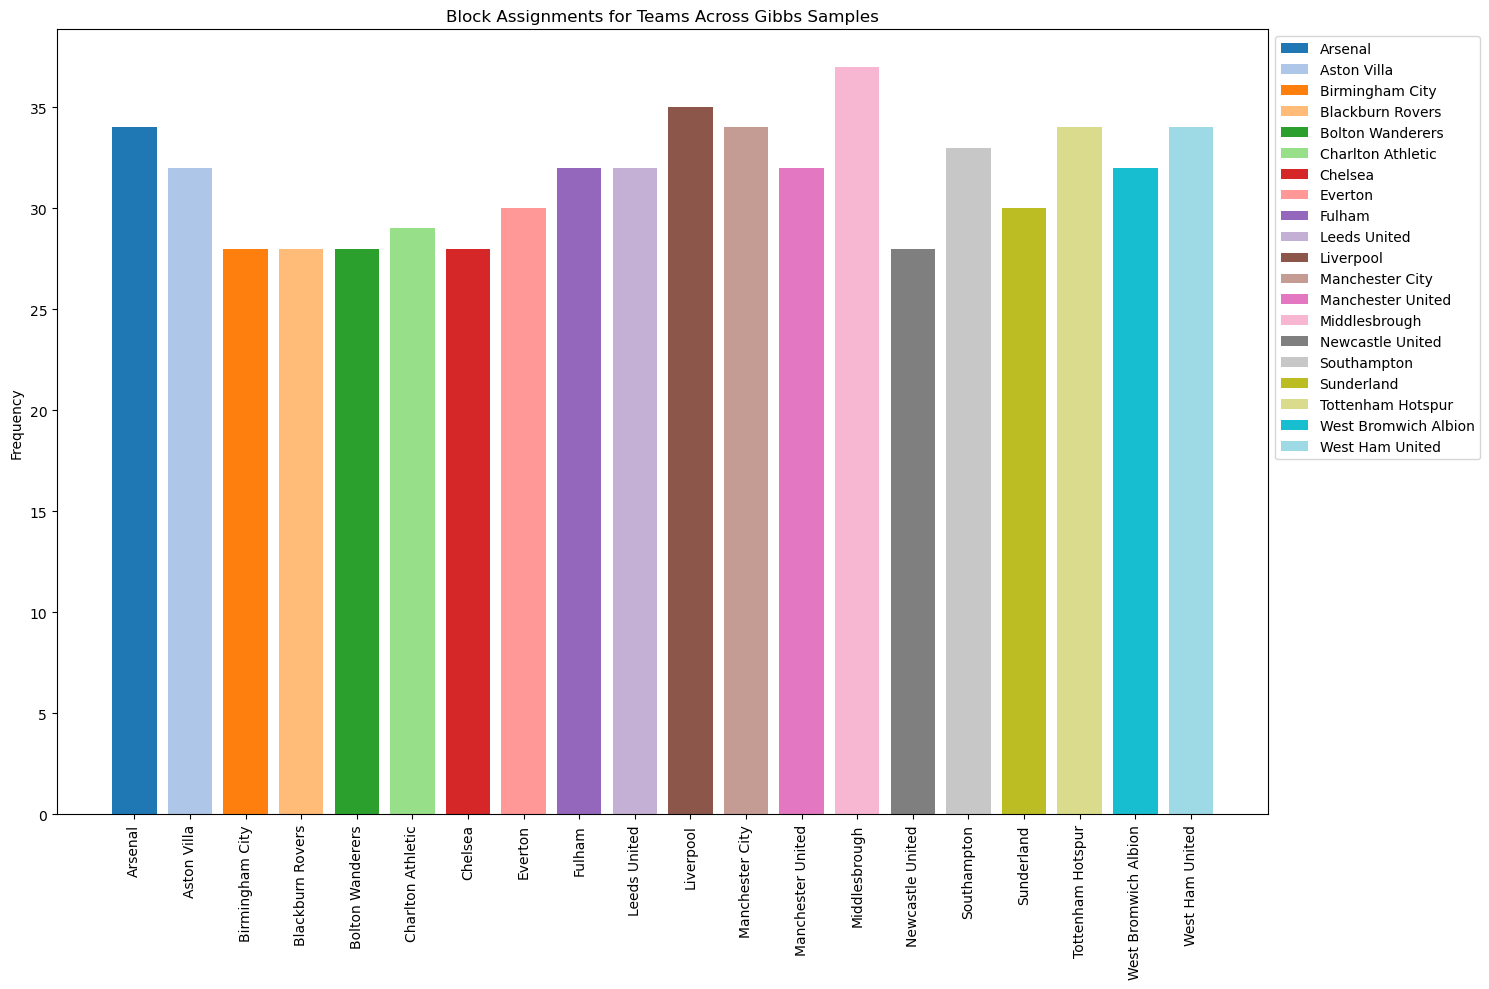

In [9]:
import matplotlib.pyplot as plt

def plot_block_assignments(z_corrected_samples, team_names):
    """
    Plot the frequency of each team's assignment to the different blocks across all Gibbs samples.
    """
    # Count the block assignments for each team
    block_counts = np.zeros((len(team_names), K))
    for z in z_corrected_samples:
        for i, block in enumerate(z):
            block_counts[i, block] += 1

    # Plot the block assignments
    plt.figure(figsize=(15, 10))
    for i, team in enumerate(team_names):
        plt.bar(i, block_counts[i].max(), label=team, tick_label=team, color=plt.cm.tab20(i / len(team_names)))

    plt.xticks(np.arange(len(team_names)), team_names, rotation=90)
    plt.ylabel("Frequency")
    plt.title("Block Assignments for Teams Across Gibbs Samples")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Plot block assignments for teams
plot_block_assignments(z_corrected_samples, season_df.index)


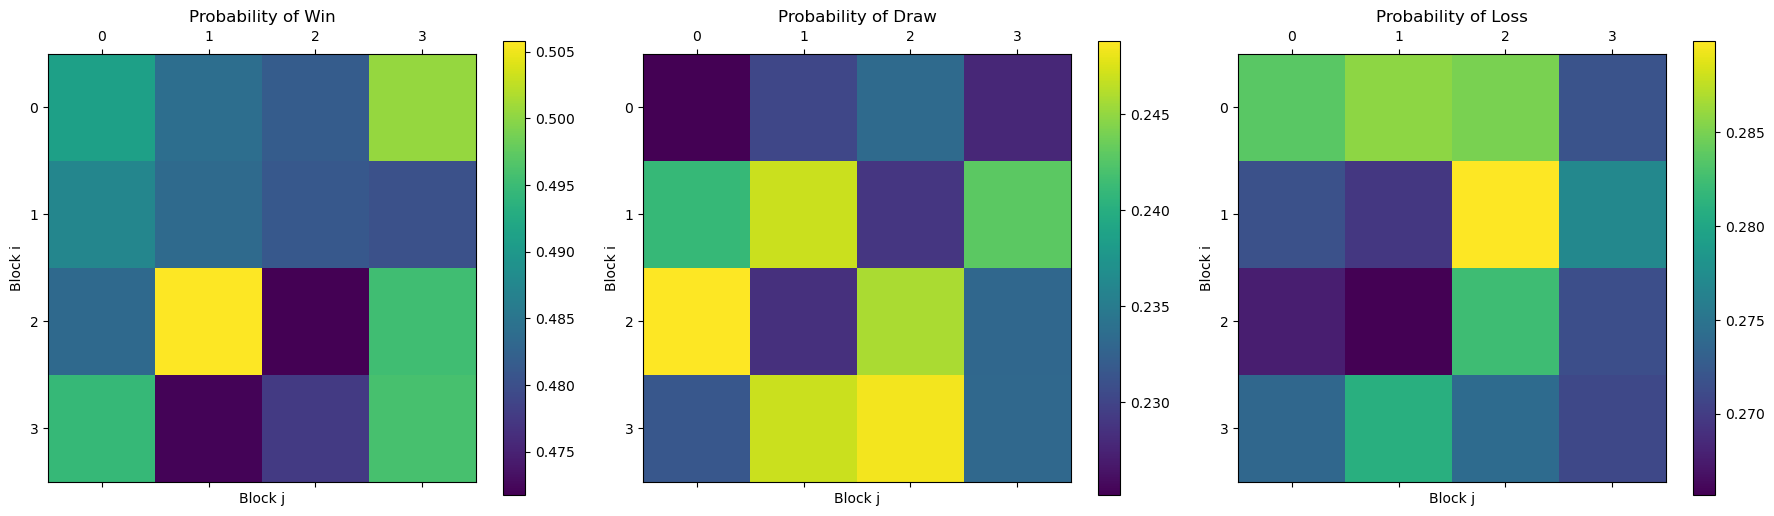

In [10]:
def plot_heatmaps(p_estimate, outcome_labels):
    """
    Plot heatmaps for the block interaction probabilities.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, label in enumerate(outcome_labels):
        ax = axes[i]
        cax = ax.matshow(p_estimate[:, :, i], cmap="viridis")
        ax.set_title(f"Probability of {label}")
        ax.set_xlabel("Block j")
        ax.set_ylabel("Block i")
        fig.colorbar(cax, ax=ax)

    plt.tight_layout()
    plt.show()

# Outcome labels
outcome_labels = ["Win", "Draw", "Loss"]

# Plot the heatmaps
plot_heatmaps(p_estimate, outcome_labels)


In [11]:
def list_teams_by_block(z_corrected_samples, team_names):
    """
    Identify which teams are most frequently assigned to each block.
    """
    # Count the block assignments for each team
    block_counts = np.zeros((len(team_names), K))
    for z in z_corrected_samples:
        for i, block in enumerate(z):
            block_counts[i, block] += 1

    # Identify the most frequent block for each team
    most_frequent_blocks = block_counts.argmax(axis=1)
    
    # List teams by block
    teams_by_block = {k: [] for k in range(K)}
    for i, block in enumerate(most_frequent_blocks):
        teams_by_block[block].append(team_names[i])
    
    return teams_by_block

# List the teams most frequently assigned to each block
teams_by_block = list_teams_by_block(z_corrected_samples, season_df.index)
teams_by_block


{0: ['Birmingham City',
  'Leeds United',
  'Manchester City',
  'Newcastle United',
  'Sunderland'],
 1: ['Aston Villa',
  'Bolton Wanderers',
  'Charlton Athletic',
  'Liverpool',
  'Middlesbrough',
  'West Ham United'],
 2: ['Arsenal',
  'Chelsea',
  'Everton',
  'Fulham',
  'Southampton',
  'Tottenham Hotspur'],
 3: ['Blackburn Rovers', 'Manchester United', 'West Bromwich Albion']}

<Figure size 1500x1000 with 0 Axes>

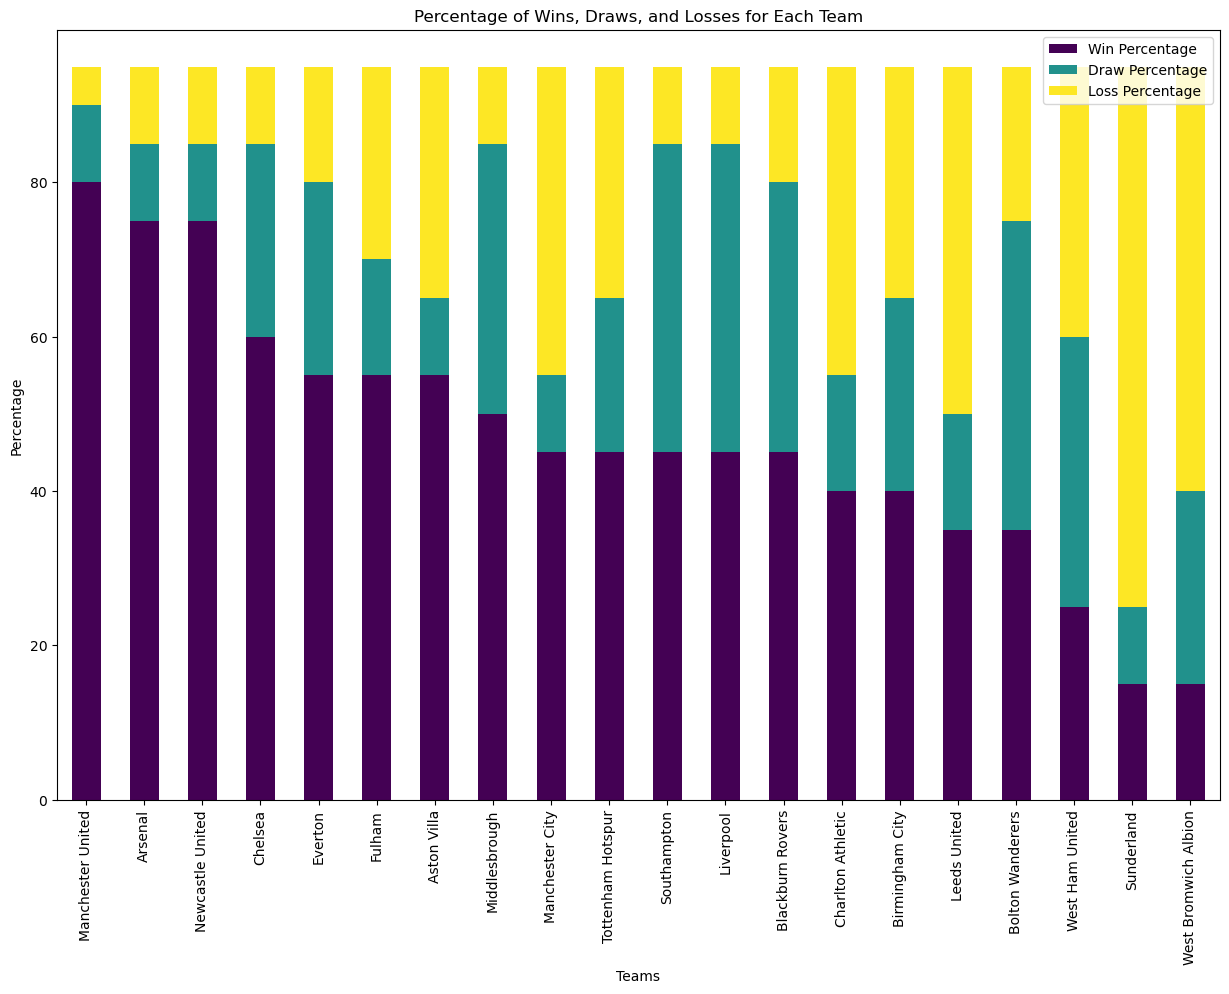

In [12]:
# 1. Calculate the percentage of wins, draws, and losses for each team

# Convert the results matrix R back to win, draw, loss format
results_df = pd.DataFrame(R, index=season_df.index, columns=season_df.columns)

# Calculate win, draw, and loss percentages
win_percentage = (results_df == 1).sum(axis=1) / N * 100
draw_percentage = (results_df == 2).sum(axis=1) / N * 100
loss_percentage = (results_df == 3).sum(axis=1) / N * 100

# Combine the percentages into a DataFrame
percentage_df = pd.DataFrame({
    'Win Percentage': win_percentage,
    'Draw Percentage': draw_percentage,
    'Loss Percentage': loss_percentage
})

# Order by position in the final league table (assuming higher win percentage indicates higher position)
percentage_df = percentage_df.sort_values(by='Win Percentage', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
percentage_df.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title("Percentage of Wins, Draws, and Losses for Each Team")
plt.ylabel("Percentage")
plt.xlabel("Teams")
plt.show()


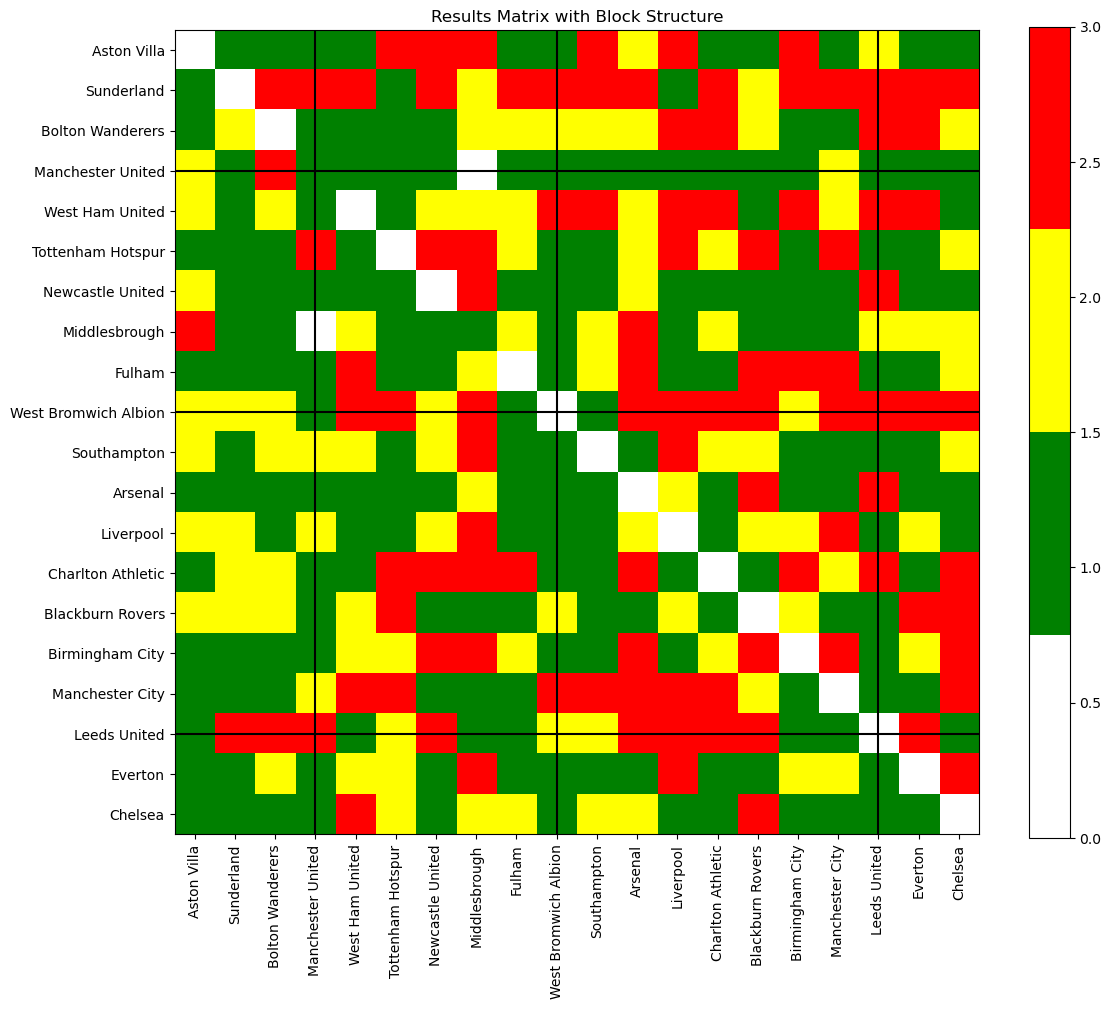

In [13]:
def plot_results_matrix_with_blocks(R, z_sample, team_names):
    """
    Plot the results matrix and visualize the block structure.
    """
    # Order teams by block assignments
    block_order = np.argsort(z_sample)
    ordered_R = R[block_order, :][:, block_order]
    
    # Create a color map for results
    colors = {
        0: 'white',  # No match/invalid
        1: 'green',  # Win
        2: 'yellow',  # Draw
        3: 'red'     # Loss
    }
    cmap = [colors[val] for val in range(4)]
    
    # Plot the results matrix
    plt.figure(figsize=(12, 10))
    plt.imshow(ordered_R, cmap=plt.matplotlib.colors.ListedColormap(cmap))
    
    # Add lines to separate blocks
    boundaries = np.where(np.diff(z_sample[block_order]))[0]
    for boundary in boundaries:
        plt.axhline(y=boundary, color='black', linewidth=1.5)
        plt.axvline(x=boundary, color='black', linewidth=1.5)
    
    # Labeling and title
    plt.xticks(np.arange(len(team_names)), [team_names[i] for i in block_order], rotation=90)
    plt.yticks(np.arange(len(team_names)), [team_names[i] for i in block_order])
    plt.title("Results Matrix with Block Structure")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Plot the results matrix for the last corrected sample of z
plot_results_matrix_with_blocks(R, z_corrected_samples[-1], season_df.index)


In [14]:
# Identify the dominant block based on the win percentage
dominant_block = percentage_df.groupby(z_corrected_samples[-1])['Win Percentage'].mean().idxmax()

# Calculate the posterior probability of each team belonging to the dominant block
posterior_prob_dominant_block = np.mean(np.array(z_corrected_samples) == dominant_block, axis=0)

# Combine team names with their posterior probabilities
dominant_block_probabilities = pd.Series(posterior_prob_dominant_block, index=season_df.index).sort_values(ascending=False)

dominant_block_probabilities


Home
Arsenal                 0.336634
Tottenham Hotspur       0.336634
Southampton             0.326733
Fulham                  0.316832
Everton                 0.297030
Chelsea                 0.277228
Manchester United       0.267327
Newcastle United        0.257426
Birmingham City         0.247525
Blackburn Rovers        0.247525
West Bromwich Albion    0.247525
Bolton Wanderers        0.237624
Sunderland              0.237624
Liverpool               0.227723
Leeds United            0.227723
Charlton Athletic       0.207921
West Ham United         0.198020
Aston Villa             0.188119
Middlesbrough           0.178218
Manchester City         0.158416
dtype: float64

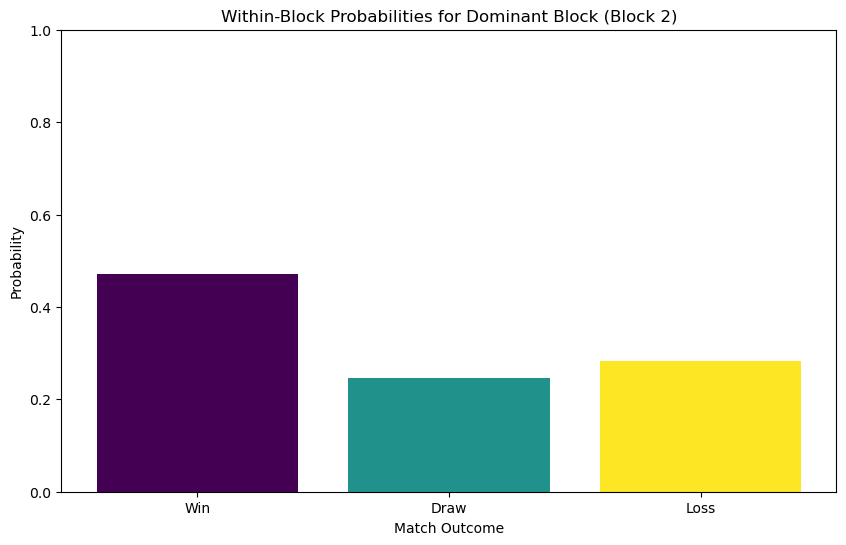

In [15]:
# Extract within-block probabilities for dominant block
within_block_probabilities = p_estimate[dominant_block, dominant_block]

# Convert to DataFrame for better visualization
within_block_prob_df = pd.DataFrame({
    'Outcome': ['Win', 'Draw', 'Loss'],
    'Probability': within_block_probabilities
})

# Recreate the bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(within_block_prob_df['Outcome'], within_block_prob_df['Probability'], color=plt.cm.viridis(np.linspace(0, 1, 3)))
plt.title(f"Within-Block Probabilities for Dominant Block (Block {dominant_block})")
plt.ylabel("Probability")
plt.xlabel("Match Outcome")
plt.ylim(0, 1)
plt.show()



In [16]:
# Calculate observed frequencies of match outcomes between blocks
observed_frequencies = np.zeros((K, K, 3))

for i in range(K):
    for j in range(K):
        mask_i = z_corrected_samples[-1] == i
        mask_j = z_corrected_samples[-1] == j
        submatrix = R[mask_i, :][:, mask_j]
        
        observed_frequencies[i, j, 0] = np.mean(submatrix == 1)  # Win
        observed_frequencies[i, j, 1] = np.mean(submatrix == 2)  # Draw
        observed_frequencies[i, j, 2] = np.mean(submatrix == 3)  # Loss

# Calculate the difference between observed frequencies and estimated probabilities
difference = observed_frequencies - p_estimate

# Summarize the average absolute difference for each outcome
avg_difference = np.abs(difference).mean(axis=(0, 1))
avg_difference


array([0.09257696, 0.07298311, 0.09541485])